In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

files_csv = [file for file in os.listdir('sil') if file[-3:] == 'csv']
files_csv

['General_TemperatureRegulation_Regulation_within_limits_0.csv',
 'General_TemperatureRegulation_Regulation_within_limits_1.csv',
 'General_TemperatureRegulation_Regulation_within_limits_2.csv']

In [14]:
path_datafile = os.path.join('sil/General_TemperatureRegulation_Regulation_within_limits_0.csv')
df = pd.read_csv(path_datafile)
df.columns

FileNotFoundError: [Errno 2] No such file or directory: 'pil/General_TemperatureRegulation_Regulation_within_limits_0.csv'

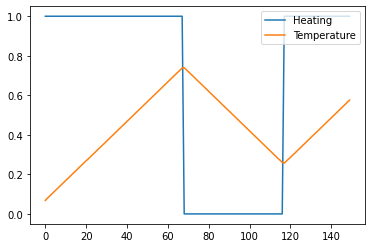

In [12]:
for data in df.columns[2:]:
  plt.plot(df.index, df[data], label=data)
plt.legend(loc='upper right')

In [13]:
temperature = df['mock.GetTemperature()'].to_numpy()
mean_temp = np.mean(temperature)
gradient = np.diff(temperature)
minima_pos = np.where(np.diff(np.sign(gradient)) > 0)[0]
minima = [temperature[idx+1] for idx in minima_pos]


KeyError: 'mock.GetTemperature()'

In [ ]:
maxima_pos = np.where(np.diff(np.sign(gradient)) < 0)[0]
maxima = [temperature[idx+1] for idx in maxima_pos]
maxima_pos


array([ 3, 11, 19, 27, 35, 43, 51, 59, 67, 75, 83, 91], dtype=int64)

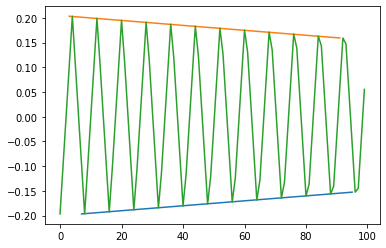

In [ ]:
plt.plot(minima_pos, minima - mean_temp)
plt.plot(maxima_pos, maxima - mean_temp)
plt.plot(df.index, temperature - mean_temp)